In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from seaborn import heatmap

# ***Dataset Pre-Processing***

In [ ]:
dataset= pd.read_csv("diabetes_prediction_dataset.csv")
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
dataset.shape

(100000, 9)

In [ ]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
status= ['hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
count=0
for i in status:
  count+=dataset[i].isnull().sum()
print('Number of with null values in any column:',count)

Number of with null values in any column: 0


In [ ]:
for i in status:
  dataset=dataset[dataset[i].notnull()]
print('Shape after removing null values in any column:',dataset.shape)

Shape after removing null values in any column: (100000, 9)


In [ ]:
pd.crosstab(dataset.diabetes,dataset.gender)

gender,Female,Male,Other
diabetes,,,
0,54091,37391,18
1,4461,4039,0


In [ ]:
dataset=dataset[dataset['gender']!='Other']
dataset.shape

(99982, 9)

# ***Dataset Description***

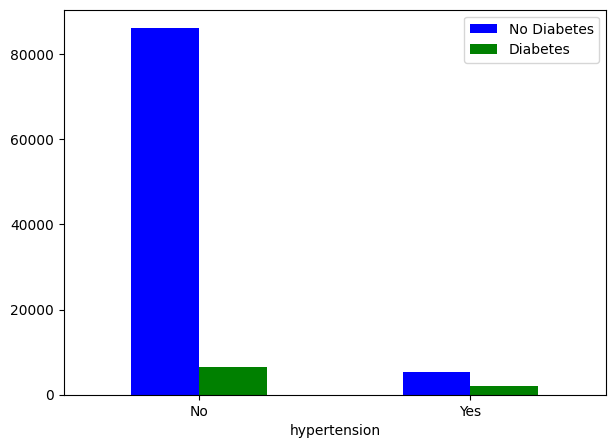

In [ ]:
ht=pd.crosstab(dataset.hypertension, dataset.diabetes)
colors= ['blue','green']
fig,(ax1)=plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ht.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.set_xticklabels(['No','Yes'])
ax1.legend(labels=['No Diabetes','Diabetes'])

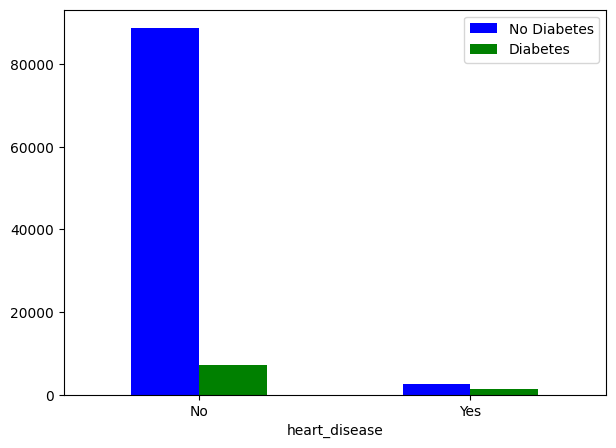

In [ ]:
hd=pd.crosstab(dataset.heart_disease, dataset.diabetes)
colors= ['blue','green']
fig,(ax1)=plt.subplots(nrows=1, ncols=1, figsize=(7,5))
hd.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.set_xticklabels(['No','Yes'])
ax1.legend(labels=['No Diabetes','Diabetes'])

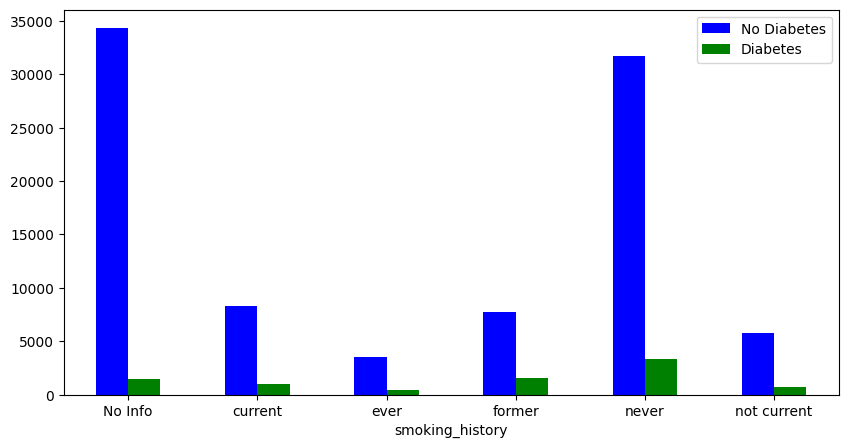

In [ ]:
sh=pd.crosstab(dataset.smoking_history, dataset.diabetes)
colors= ['blue','green']
fig,(ax1)=plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sh.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.legend(labels=['No Diabetes','Diabetes'])

<Axes: xlabel='bmi', ylabel='Count'>

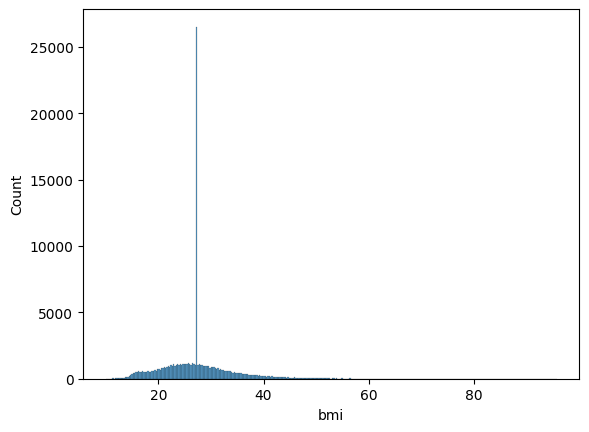

In [ ]:
sns.histplot(dataset['bmi'])

<Axes: xlabel='HbA1c_level', ylabel='Count'>

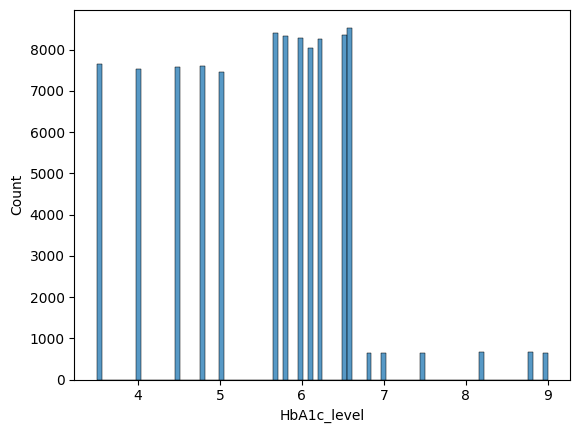

In [ ]:
sns.histplot(dataset['HbA1c_level'])

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

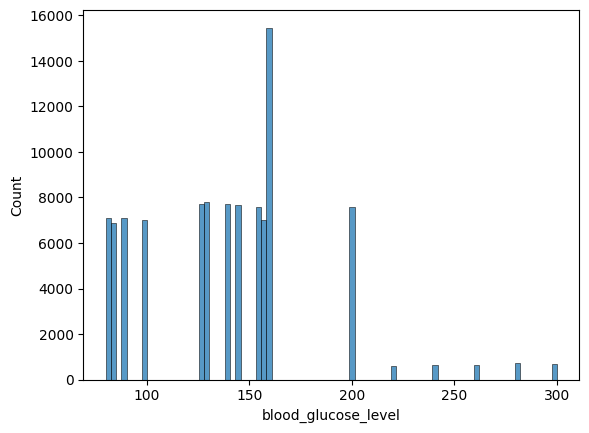

In [ ]:
sns.histplot(dataset['blood_glucose_level'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [ ]:
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
enc=LabelEncoder()
dataset['gender'] =enc.fit_transform(dataset['gender'])
print(dataset['gender'].head())

0    0
1    0
2    1
3    0
4    1
Name: gender, dtype: int64


In [ ]:
dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
dataset['smoking_history'] =enc.fit_transform(dataset['smoking_history'])
print(dataset['smoking_history'].head())

0    4
1    0
2    4
3    1
4    1
Name: smoking_history, dtype: int64


In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
corr=dataset.corr()
corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030369,0.014381,0.077886,-0.078255,-0.023023,0.020044,0.017196,0.037623
age,-0.030369,1.000000,0.251163,0.233352,0.228710,0.337378,0.101343,0.110679,0.257999
hypertension,0.014381,0.251163,1.000000,0.121253,0.093213,0.147679,0.080941,0.084436,0.197811
heart_disease,0.077886,0.233352,0.121253,1.000000,0.027618,0.061203,0.067591,0.070071,0.171718
smoking_history,-0.078255,0.228710,0.093213,0.027618,1.000000,0.179401,0.037313,0.040288,0.094328
bmi,-0.023023,0.337378,0.147679,0.061203,0.179401,1.000000,0.083017,0.091310,0.214377
HbA1c_level,0.020044,0.101343,0.080941,0.067591,0.037313,0.083017,1.000000,0.166831,0.400696
blood_glucose_level,0.017196,0.110679,0.084436,0.070071,0.040288,0.091310,0.166831,1.000000,0.419587
diabetes,0.037623,0.257999,0.197811,0.171718,0.094328,0.214377,0.400696,0.419587,1.000000


<Axes: >

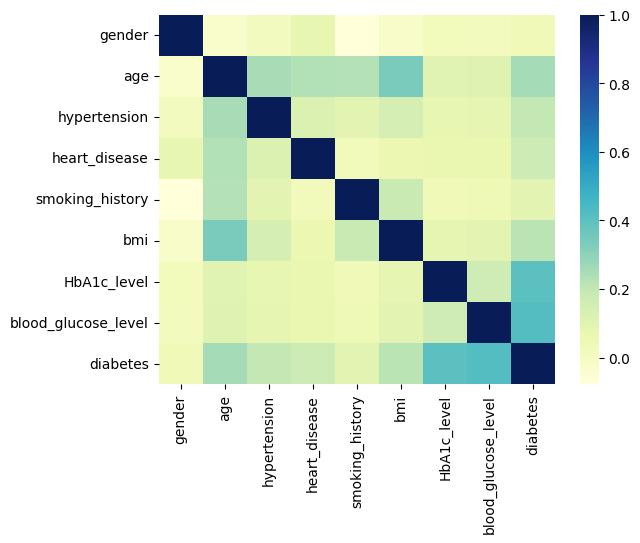

In [ ]:
sns.heatmap(corr,cmap='YlGnBu')

# ***Dataset Splitting***

In [ ]:
X = dataset.drop('diabetes', axis=1)
Y= dataset['diabetes']

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, stratify=Y, test_size=0.3)

In [ ]:
print("Training set: X->{} , Y->{} \n Testing set: X->{} , Y->{}".format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

Training set: X->(69987, 8) , Y->(69987,) 
 Testing set: X->(29995, 8) , Y->(29995,)


In [ ]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
98991,0,51.0,0,0,0,25.65,5.7,159
49861,0,80.0,0,0,5,27.32,5.7,126
92804,0,43.0,0,0,0,18.43,6.1,85
11527,0,35.0,0,0,5,27.89,6.1,280
43372,1,64.0,1,0,3,28.97,6.2,280
...,...,...,...,...,...,...,...,...
66796,1,80.0,0,0,3,26.25,6.1,220
85946,1,73.0,0,0,4,26.04,4.0,130
13508,0,10.0,0,0,0,27.32,4.0,200
21288,1,26.0,0,0,0,27.32,4.0,126


In [ ]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
77024,0,54.0,0,0,4,32.95,4.8,85
45112,1,3.0,0,0,0,27.32,4.8,130
75053,0,52.0,0,0,4,27.32,5.8,155
49235,1,12.0,0,0,4,21.58,6.1,140
36417,0,80.0,0,0,3,22.74,5.7,85
...,...,...,...,...,...,...,...,...
22402,0,78.0,0,0,5,28.91,6.6,100
30654,1,20.0,0,0,5,35.20,4.5,145
42858,0,80.0,0,0,0,27.32,5.7,145
73241,1,14.0,0,0,4,18.39,5.8,90


# ***Model Training and Testing***

In [ ]:
model_names= []
model_accuracy= []

def confusion_matrix_plot(matrix, model_name):
  _,ax=plt.subplots(figsize=(5,4))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
  ax.set_xticklabels(['Positive','Negative'])
  ax.set_yticklabels(['Positive','Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

**Decision Tree**

In [ ]:
dt= DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27445
           1       0.71      0.75      0.73      2550

    accuracy                           0.95     29995
   macro avg       0.84      0.86      0.85     29995
weighted avg       0.95      0.95      0.95     29995



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(dt.predict(X_test),Y_test)
print(confusion_matrix)

[[26670   645]
 [  775  1905]]


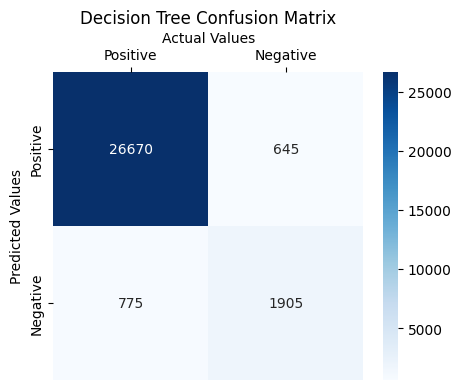

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_plot(confusion_matrix( dt.predict(X_test),Y_test),'Decision Tree')

In [ ]:
model_names.append('Decision Tree')
model_accuracy.append(dt.score(X_test, Y_test))

**Naive Bayes**

In [ ]:
nb= GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27445
           1       0.46      0.64      0.53      2550

    accuracy                           0.90     29995
   macro avg       0.71      0.78      0.74     29995
weighted avg       0.92      0.90      0.91     29995



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(nb.predict(X_test),Y_test)
print(confusion_matrix)

[[25489   915]
 [ 1956  1635]]


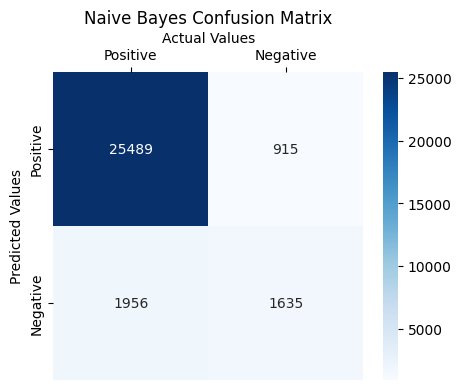

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_plot(confusion_matrix( nb.predict(X_test),Y_test),'Naive Bayes')

In [ ]:
model_names.append('Naive Bayes')
model_accuracy.append(nb.score(X_test, Y_test))

**Neural Network**

In [ ]:
nn= MLPClassifier()
nn.fit(X_train,Y_train)

MLPClassifier()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, nn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27445
           1       0.94      0.61      0.74      2550

    accuracy                           0.96     29995
   macro avg       0.95      0.80      0.86     29995
weighted avg       0.96      0.96      0.96     29995



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(nn.predict(X_test),Y_test)
print(confusion_matrix)

[[27341  1004]
 [  104  1546]]


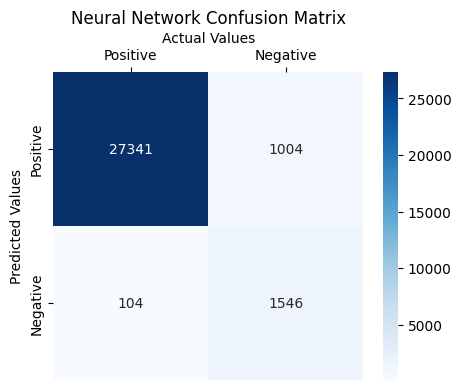

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_plot(confusion_matrix( nn.predict(X_test),Y_test),'Neural Network')

In [ ]:
model_names.append('Neural Network')
model_accuracy.append(nn.score(X_test, Y_test))

# ***Model Comparison***

<BarContainer object of 3 artists>

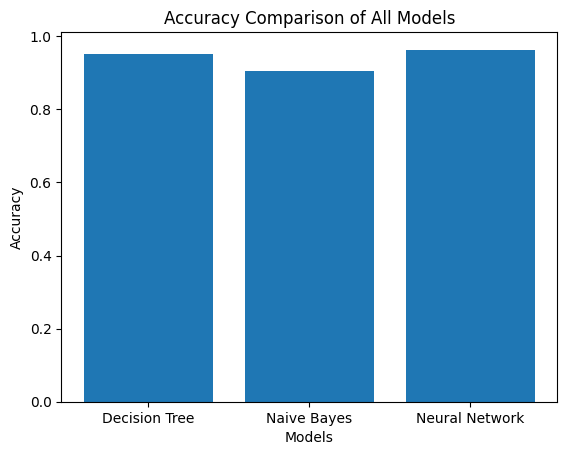

In [ ]:
plt.title('Accuracy Comparison of All Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.bar(model_names,model_accuracy)